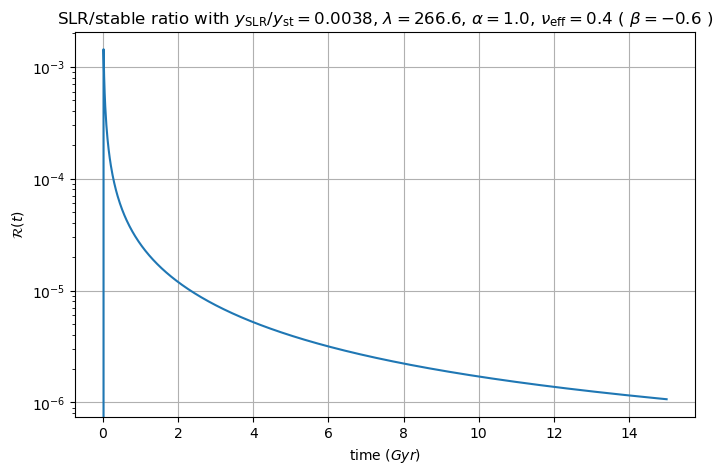

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# -------- Parameters (editable) --------
y_ratio = 3.8 * 10**-3      # y_SLR / y_st
lam = 266.6        # lambda
alpha = 1.0        # inflow decay
nu_eff = 0.4       # effective consumption
t_min, t_max = 0.0, 15.0
n_pts = 1000
# ---------------------------------------

beta = nu_eff - alpha
if abs(beta) < 1e-12:
    beta = np.sign(beta) * 1e-12 if beta != 0 else 1e-12

def R_of_t(t, y_ratio, lam, beta):
    exp_bt = np.exp(beta*t)
    exp_mlt = np.exp(-lam*t)
    num = beta * ( lam*(exp_bt - 1.0) + beta*(exp_mlt - 1.0) )
    den = lam * (lam + beta) * ( exp_bt - 1.0 - beta*t )
    return y_ratio * (num / den)

t = np.linspace(max(1e-9, t_min), t_max, n_pts)
R = R_of_t(t, y_ratio, lam, beta)

plt.figure(figsize=(8,5))
plt.plot(t, R)
plt.xlabel('time $(Gyr)$')
plt.ylabel(r'$\mathcal{R}(t)$')
plt.title(fr'SLR/stable ratio with $y_{{\rm SLR}}/y_{{\rm st}}={y_ratio}$, $\lambda={lam}$, $\alpha={alpha}$, $\nu_{{\rm eff}}={nu_eff}$ ( $\beta={beta:.3g}$ )')
plt.grid(True)
plt.yscale("log")
plt.show()

